In [2]:
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:93: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.


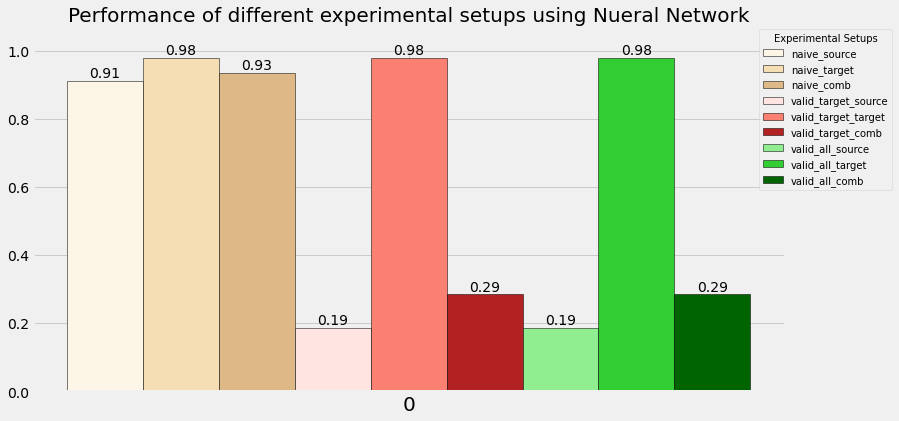

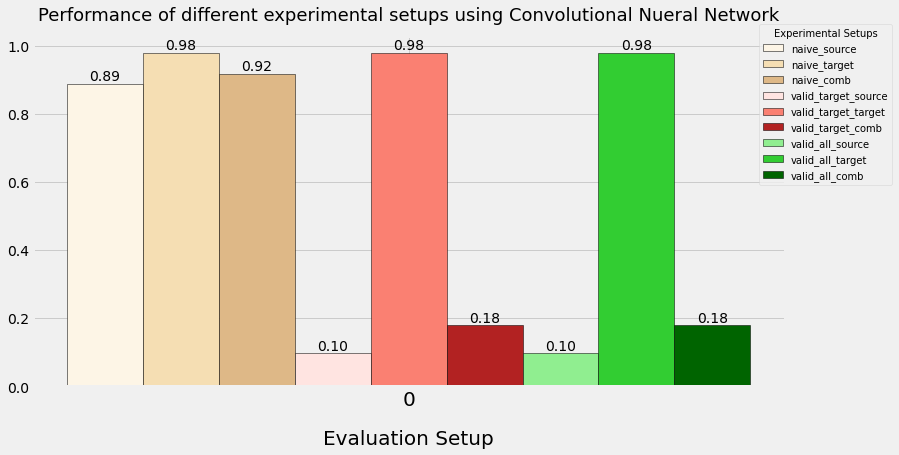

In [4]:
baseline_exp1 = pd.read_excel('/content/drive/MyDrive/AI in healthcare and Wearables/baseline_exp1.xlsx')
baseline_exp1 = baseline_exp1.drop(columns=['accuracy'])
baseline_exp1 = baseline_exp1.drop(columns = ['loss','precision','recall'])
baseline_exp1 = baseline_exp1[baseline_exp1['model'].str.contains("initial") == False]
baseline_exp1['model'] = baseline_exp1['model'].replace({'dense_':'', 'conv_':'','transfer1':'valid_target','transfer2':'valid_all','infreq':'target','freq':'source'}, regex=True)

nn_report = baseline_exp1.iloc[:9]
nn_report_t = nn_report.T
nn_report_t.columns = nn_report_t.iloc[0]
nn_report_t = nn_report_t[1:]

cnn_report = baseline_exp1.iloc[9:]
cnn_report_t = cnn_report.T
cnn_report_t.columns = cnn_report_t.iloc[0]
cnn_report_t = cnn_report_t[1:]

#NN vs CNN plot
plt.style.use("fivethirtyeight")

fig, ax = plt.subplots(1,1, figsize = (12,6))

label = nn_report_t.index

x = np.arange(len(label))

width = 0.01

rect1 = ax.bar(x - 4 * width,nn_report_t['naive_source'],width = width, label = 'naive_source',edgecolor = "black",align='center',color = 'oldlace')
rect2 = ax.bar(x - 3 * width,nn_report_t['naive_target'],width = width,label = 'naive_target',edgecolor = "black",align='center',color = 'wheat')
rect3 = ax.bar(x - 2 * width,nn_report_t['naive_comb'],width = width,label = 'naive_comb',edgecolor = "black",align='center',color = 'burlywood')
rect4 = ax.bar(x - 1 * width,nn_report_t['valid_target_source'],width = width, label = 'valid_target_source',edgecolor = "black",align='center',color = 'mistyrose')
rect5 = ax.bar(x,nn_report_t['valid_target_target'],width = width,label = 'valid_target_target',edgecolor = "black",align='center',color = 'salmon')
rect6 = ax.bar(x + 1 * width,nn_report_t['valid_target_comb'],width = width,label = 'valid_target_comb',edgecolor = "black",align='center',color = 'firebrick')
rect7 = ax.bar(x + 2 * width,nn_report_t['valid_all_source'],width = width, label = 'valid_all_source',edgecolor = "black",align='center',color = 'lightgreen')
rect8 = ax.bar(x + 3 * width,nn_report_t['valid_all_target'],width = width,label = 'valid_all_target',edgecolor = "black",align='center',color = 'limegreen')
rect9 = ax.bar(x + 4 * width,nn_report_t['valid_all_comb'],width = width,label = 'valid_all_comb',edgecolor = "black",align='center',color = 'darkgreen')

ax.set_title("Performance of different experimental setups using Nueral Network",fontsize = 20,pad = 20)

ax.set_xticks(x)

def autolabel(rects, xpos='center'):
   for rect in rects:
      height = rect.get_height()
      ax.annotate('{:.2f}'.format(height),
         xy=(rect.get_x() + rect.get_width() / 2, height),textcoords="offset points", va='bottom',horizontalalignment='center')

autolabel(rect1)
autolabel(rect2)
autolabel(rect3)
autolabel(rect4)
autolabel(rect5)
autolabel(rect6)
autolabel(rect7)
autolabel(rect8)
autolabel(rect9)

ax.legend(title = "Experimental Setups",fontsize = 10, title_fontsize = 10, loc = 'upper right',bbox_to_anchor=(1.15, 1.05))

ax.tick_params(axis = "x",labelsize = 20)
plt.savefig('/content/drive/MyDrive/AI in healthcare and Wearables/plots/NN_4_plot.png')

#CNN plot
plt.style.use("fivethirtyeight")

fig, ax = plt.subplots(1,1, figsize = (12,6))

label1 = cnn_report_t.index

x = np.arange(len(label1))

width = 0.01

rect1 = ax.bar(x - 4 * width,cnn_report_t['naive_source'],width = width, label = 'naive_source',edgecolor = "black",align='center',color = 'oldlace')
rect2 = ax.bar(x - 3 * width,cnn_report_t['naive_target'],width = width,label = 'naive_target',edgecolor = "black",align='center',color = 'wheat')
rect3 = ax.bar(x - 2 * width,cnn_report_t['naive_comb'],width = width,label = 'naive_comb',edgecolor = "black",align='center',color = 'burlywood')
rect4 = ax.bar(x - 1 * width,cnn_report_t['valid_target_source'],width = width, label = 'valid_target_source',edgecolor = "black",align='center',color = 'mistyrose')
rect5 = ax.bar(x,cnn_report_t['valid_target_target'],width = width,label = 'valid_target_target',edgecolor = "black",align='center',color = 'salmon')
rect6 = ax.bar(x + 1 * width,cnn_report_t['valid_target_comb'],width = width,label = 'valid_target_comb',edgecolor = "black",align='center',color = 'firebrick')
rect7 = ax.bar(x + 2 * width,cnn_report_t['valid_all_source'],width = width, label = 'valid_all_source',edgecolor = "black",align='center',color = 'lightgreen')
rect8 = ax.bar(x + 3 * width,cnn_report_t['valid_all_target'],width = width,label = 'valid_all_target',edgecolor = "black",align='center',color = 'limegreen')
rect9 = ax.bar(x + 4 * width,cnn_report_t['valid_all_comb'],width = width,label = 'valid_all_comb',edgecolor = "black",align='center',color = 'darkgreen')
ax.set_xlabel("Evaluation Setup",fontsize = 20,labelpad =20)
ax.set_title("Performance of different experimental setups using Convolutional Nueral Network",fontsize = 18,pad = 16)

ax.set_xticks(x)
# ax.set_xticklabels(label)

def autolabel(rects, xpos='center'):
   for rect in rects:
      height = rect.get_height()
      ax.annotate('{:.2f}'.format(height),
         xy=(rect.get_x() + rect.get_width() / 2, height),textcoords="offset points", va='bottom',horizontalalignment='center')

autolabel(rect1)
autolabel(rect2)
autolabel(rect3)
autolabel(rect4)
autolabel(rect5)
autolabel(rect6)
autolabel(rect7)
autolabel(rect8)
autolabel(rect9)

ax.legend(title = "Experimental Setups",fontsize = 10, title_fontsize = 10,loc= 'upper right',bbox_to_anchor=(1.15, 1.05))

ax.tick_params(axis = "x",labelsize = 20)

plt.savefig('/content/drive/MyDrive/AI in healthcare and Wearables/plots/CNN_4_plot.png')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:78: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.


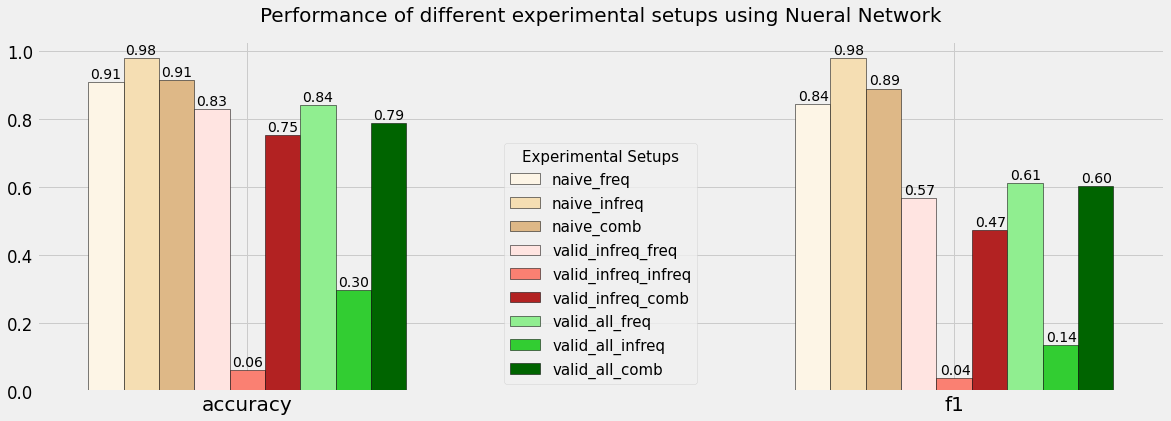

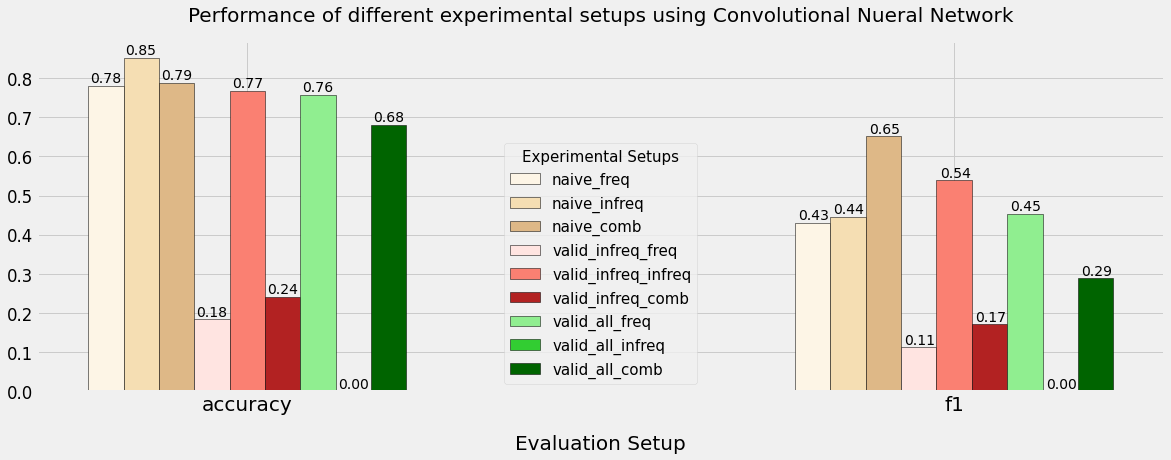

In [ ]:
#NN vs CNN plot
plt.style.use("fivethirtyeight")

fig, ax = plt.subplots(1,1, figsize = (18,6))

label = nn_report_t.index

x = np.arange(len(label))

width = 0.05

rect1 = ax.bar(x - 4 * width,nn_report_t['naive_freq'],width = width, label = 'naive_freq',edgecolor = "black",align='center',color = 'oldlace')
rect2 = ax.bar(x - 3 * width,nn_report_t['naive_infreq'],width = width,label = 'naive_infreq',edgecolor = "black",align='center',color = 'wheat')
rect3 = ax.bar(x - 2 * width,nn_report_t['naive_comb'],width = width,label = 'naive_comb',edgecolor = "black",align='center',color = 'burlywood')
rect4 = ax.bar(x - 1 * width,nn_report_t['valid_infreq_freq'],width = width, label = 'valid_infreq_freq',edgecolor = "black",align='center',color = 'mistyrose')
rect5 = ax.bar(x,nn_report_t['valid_infreq_infreq'],width = width,label = 'valid_infreq_infreq',edgecolor = "black",align='center',color = 'salmon')
rect6 = ax.bar(x + 1 * width,nn_report_t['valid_infreq_comb'],width = width,label = 'valid_infreq_comb',edgecolor = "black",align='center',color = 'firebrick')
rect7 = ax.bar(x + 2 * width,nn_report_t['valid_all_freq'],width = width, label = 'valid_all_freq',edgecolor = "black",align='center',color = 'lightgreen')
rect8 = ax.bar(x + 3 * width,nn_report_t['valid_all_infreq'],width = width,label = 'valid_all_infreq',edgecolor = "black",align='center',color = 'limegreen')
rect9 = ax.bar(x + 4 * width,nn_report_t['valid_all_comb'],width = width,label = 'valid_all_comb',edgecolor = "black",align='center',color = 'darkgreen')

ax.set_title("Performance of different experimental setups using Nueral Network",fontsize = 20,pad = 20)

ax.set_xticks(x)
ax.set_xticklabels(label)

def autolabel(rects, xpos='center'):
   for rect in rects:
      height = rect.get_height()
      ax.annotate('{:.2f}'.format(height),
         xy=(rect.get_x() + rect.get_width() / 2, height),textcoords="offset points", va='bottom',horizontalalignment='center')

autolabel(rect1)
autolabel(rect2)
autolabel(rect3)
autolabel(rect4)
autolabel(rect5)
autolabel(rect6)
autolabel(rect7)
autolabel(rect8)
autolabel(rect9)

ax.legend(title = "Experimental Setups",fontsize = 15, title_fontsize = 15)

ax.tick_params(axis = "x",labelsize = 20)
plt.savefig('NN_plot.png')

#CNN plot
plt.style.use("fivethirtyeight")

fig, ax = plt.subplots(1,1, figsize = (18,6))

label = cnn_report_t.index

x = np.arange(len(label))

width = 0.05

rect1 = ax.bar(x - 4 * width,cnn_report_t['naive_freq'],width = width, label = 'naive_freq',edgecolor = "black",align='center',color = 'oldlace')
rect2 = ax.bar(x - 3 * width,cnn_report_t['naive_infreq'],width = width,label = 'naive_infreq',edgecolor = "black",align='center',color = 'wheat')
rect3 = ax.bar(x - 2 * width,cnn_report_t['naive_comb'],width = width,label = 'naive_comb',edgecolor = "black",align='center',color = 'burlywood')
rect4 = ax.bar(x - 1 * width,cnn_report_t['valid_infreq_freq'],width = width, label = 'valid_infreq_freq',edgecolor = "black",align='center',color = 'mistyrose')
rect5 = ax.bar(x,cnn_report_t['valid_infreq_infreq'],width = width,label = 'valid_infreq_infreq',edgecolor = "black",align='center',color = 'salmon')
rect6 = ax.bar(x + 1 * width,cnn_report_t['valid_infreq_comb'],width = width,label = 'valid_infreq_comb',edgecolor = "black",align='center',color = 'firebrick')
rect7 = ax.bar(x + 2 * width,cnn_report_t['valid_all_freq'],width = width, label = 'valid_all_freq',edgecolor = "black",align='center',color = 'lightgreen')
rect8 = ax.bar(x + 3 * width,cnn_report_t['valid_all_infreq'],width = width,label = 'valid_all_infreq',edgecolor = "black",align='center',color = 'limegreen')
rect9 = ax.bar(x + 4 * width,cnn_report_t['valid_all_comb'],width = width,label = 'valid_all_comb',edgecolor = "black",align='center',color = 'darkgreen')
ax.set_xlabel("Evaluation Setup",fontsize = 20,labelpad =20)
ax.set_title("Performance of different experimental setups using Convolutional Nueral Network",fontsize = 20,pad = 20)

ax.set_xticks(x)
ax.set_xticklabels(label)

def autolabel(rects, xpos='center'):
   for rect in rects:
      height = rect.get_height()
      ax.annotate('{:.2f}'.format(height),
         xy=(rect.get_x() + rect.get_width() / 2, height),textcoords="offset points", va='bottom',horizontalalignment='center')

autolabel(rect1)
autolabel(rect2)
autolabel(rect3)
autolabel(rect4)
autolabel(rect5)
autolabel(rect6)
autolabel(rect7)
autolabel(rect8)
autolabel(rect9)

ax.legend(title = "Experimental Setups",fontsize = 15, title_fontsize = 15)

ax.tick_params(axis = "x",labelsize = 20)

plt.savefig('CNN_plot.png')

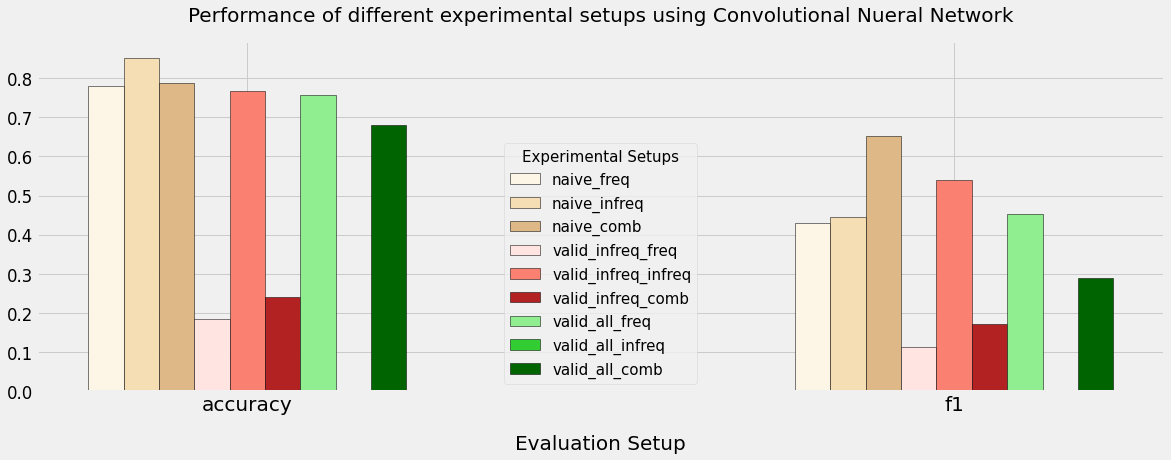

In [ ]:
#CNN plot
plt.style.use("fivethirtyeight")

fig, ax = plt.subplots(1,1, figsize = (18,6))

label = cnn_report_t.index

x = np.arange(len(label))

width = 0.05

rect1 = ax.bar(x - 4 * width,cnn_report_t['naive_freq'],width = width, label = 'naive_freq',edgecolor = "black",align='center',color = 'oldlace')
rect2 = ax.bar(x - 3 * width,cnn_report_t['naive_infreq'],width = width,label = 'naive_infreq',edgecolor = "black",align='center',color = 'wheat')
rect3 = ax.bar(x - 2 * width,cnn_report_t['naive_comb'],width = width,label = 'naive_comb',edgecolor = "black",align='center',color = 'burlywood')
rect4 = ax.bar(x - 1 * width,cnn_report_t['valid_infreq_freq'],width = width, label = 'valid_infreq_freq',edgecolor = "black",align='center',color = 'mistyrose')
rect5 = ax.bar(x,cnn_report_t['valid_infreq_infreq'],width = width,label = 'valid_infreq_infreq',edgecolor = "black",align='center',color = 'salmon')
rect6 = ax.bar(x + 1 * width,cnn_report_t['valid_infreq_comb'],width = width,label = 'valid_infreq_comb',edgecolor = "black",align='center',color = 'firebrick')
rect7 = ax.bar(x + 2 * width,cnn_report_t['valid_all_freq'],width = width, label = 'valid_all_freq',edgecolor = "black",align='center',color = 'lightgreen')
rect8 = ax.bar(x + 3 * width,cnn_report_t['valid_all_infreq'],width = width,label = 'valid_all_infreq',edgecolor = "black",align='center',color = 'limegreen')
rect9 = ax.bar(x + 4 * width,cnn_report_t['valid_all_comb'],width = width,label = 'valid_all_comb',edgecolor = "black",align='center',color = 'darkgreen')
ax.set_xlabel("Evaluation Setup",fontsize = 20,labelpad =20)
ax.set_title("Performance of different experimental setups using Convolutional Nueral Network",fontsize = 20,pad = 20)

ax.set_xticks(x)
ax.set_xticklabels(label)

ax.legend(title = "Experimental Setups",fontsize = 15, title_fontsize = 15)

ax.tick_params(axis = "x",labelsize = 20)